In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import ImageColor, Image
import numpy as np
from IPython.display import display
import math
import os.path

In [33]:
def crear_nube_palabras(arreglo, path_salida, color_fondo=(255, 255, 255), tamano_cm = (9.0 , 9.0), ppi = 90, mascara = None, color_contorno = 'steelblue' ):
    """
    Genera un archivo PNG de una nube de palabras a partir de un arreglo de etiquetas ponderadas.

    Las etiquetas con mayor peso serán más grandes y tenderán a aparecer en el centro.

    Args:
        arreglo (list): Arreglo de diccionarios de la forma {"etiqueta": "Etiqueta", "peso": 10}.
        path_salida (str): La ruta del archivo PNG de salida (ej: "nube.png").
        color_fondo (tuple): El color de fondo de la nube en formato RGB (ej: (255, 255, 255) para blanco).
    """
    if not arreglo:
        print("El arreglo de entrada está vacío. No se generará ninguna imagen.")
        return

    # 1. Convertir el color RGB de fondo a formato de cadena (ej: 'rgb(255, 255, 255)')
    try:
        color_rgb_str = f'rgb({color_fondo[0]}, {color_fondo[1]}, {color_fondo[2]})'
        # Verificar si es un color RGB válido
        ImageColor.getcolor(color_rgb_str, "RGB")
    except ValueError:
        print(f"Error: El color de fondo {color_fondo} no es un formato RGB válido.")
        return
    except Exception as e:
        print(f"Ocurrió un error al procesar el color de fondo: {e}")
        return

    # 2. Convertir el arreglo de entrada a un diccionario de frecuencias
    #    donde la clave es la etiqueta y el valor es el peso.
    frecuencias = {item["etiqueta"]: item["peso"] for item in arreglo}
    
    # 3. Determinar el orden de las palabras (las de mayor peso al centro)
    # La clase WordCloud ya prioriza palabras de mayor frecuencia (peso) 
    # para ubicarlas al centro y con mayor tamaño.
    
    # convierte la mascara si esta especificada
    mascara1 = None
    if mascara is not None and os.path.exists(mascara):
        mascara1 = np.array(Image.open(mascara))
    
    # Se añade un parámetro 'prefer_horizontal' para mantener la orientación
    # y 'relative_scaling' para que la relación de tamaño sea más visible.
    wordcloud = WordCloud(
        font_path = "C:\\Users\\XAVIER\\git\\portafolioXavier\\Python\\xpd_nube_palabras\\arial.ttf",
        width= math.floor( tamano_cm[0] * ppi / 2.54), 
        height= math.floor( tamano_cm[1] * ppi / 2.54),
        background_color=color_rgb_str,
        prefer_horizontal=0.9, # Preferir orientación horizontal
        relative_scaling=0.7,  # Escalar el tamaño de la palabra de forma relativa a su peso
        min_font_size=10,      # Tamaño de fuente mínimo
        max_words=len(arreglo), # Asegurar que se incluyan todas las palabras
        mask = mascara1,
        contour_color = color_contorno if color_contorno is not None and mascara1 is not None else None,
        contour_width = 3 if color_contorno is not None and mascara1 is not None else None
    )
    
    # 4. Generar la nube de palabras a partir del diccionario de frecuencias
    wordcloud.generate_from_frequencies(frecuencias)

    # 5. Guardar la imagen en la ruta especificada
    try:
        wordcloud.to_file(path_salida)
        print(f"Nube de palabras generada y guardada en: {path_salida}")
    except Exception as e:
        print(f"Error al guardar el archivo en {path_salida}: {e}")

# Ejemplo de diagrama de flujo de cómo funciona WordCloud (Conceptual)
#

In [3]:
datos="""Generative AI	Fundamento de la ola actual de innovación	10
LLMs	El motor detrás de agentes y asistentes	10
Prompt Engineering	Habilidad clave para interactuar y controlar la IA	9.5
Agente Autónomo	La evolución de la IA hacia la ejecución de tareas complejas	9.5
Intelligent Automation	Fusión de RPA con capacidades de IA	9
Modelos Fundacionales	La nueva infraestructura para construir aplicaciones	9
Vibe Coding	Nuevo paradigma de programación asistida por IA	8.5
Orquestación de Agentes	Necesario para coordinar sistemas multi-agente	8.5
RAG	Clave para dar a los LLMs conocimiento en tiempo real	8
AI Co-Pilot	Asistencia de IA integrada en herramientas de trabajo	8
Hiperautomatización	Estrategia integral para automatizar toda la empresa	7.5
Deepfake	Implicaciones éticas y de seguridad derivadas de la IA Generativa	7.5
AI Governance	Necesidad regulatoria y de confianza del usuario	7
Transfer Learning	Uso de modelos pre-entrenados para tareas específicas	7
Token / Tokenización	Unidad fundamental de costo y procesamiento en LLMs	6.5
Explainable AI	Capacidad de entender las decisiones del modelo	6.5
Transformers	Arquitectura base de los LLMs modernos	6
Low-Code / No-Code	Democratización del desarrollo habilitada por la IA	6
Chatbot 2.0	Interfaz de usuario mejorada impulsada por LLMs	5.5
Hallucination	Desafío crítico de la confiabilidad en LLMs	5.5"""

datos = datos.split("\n")
datos = [ fila.split("\t") for fila in datos ]
datos = [{"etiqueta":fila[0], "peso":float(fila[2])} for fila in datos ]
datos

[{'etiqueta': 'Generative AI', 'peso': 10.0},
 {'etiqueta': 'LLMs', 'peso': 10.0},
 {'etiqueta': 'Prompt Engineering', 'peso': 9.5},
 {'etiqueta': 'Agente Autónomo', 'peso': 9.5},
 {'etiqueta': 'Intelligent Automation', 'peso': 9.0},
 {'etiqueta': 'Modelos Fundacionales', 'peso': 9.0},
 {'etiqueta': 'Vibe Coding', 'peso': 8.5},
 {'etiqueta': 'Orquestación de Agentes', 'peso': 8.5},
 {'etiqueta': 'RAG', 'peso': 8.0},
 {'etiqueta': 'AI Co-Pilot', 'peso': 8.0},
 {'etiqueta': 'Hiperautomatización', 'peso': 7.5},
 {'etiqueta': 'Deepfake', 'peso': 7.5},
 {'etiqueta': 'AI Governance', 'peso': 7.0},
 {'etiqueta': 'Transfer Learning', 'peso': 7.0},
 {'etiqueta': 'Token / Tokenización', 'peso': 6.5},
 {'etiqueta': 'Explainable AI', 'peso': 6.5},
 {'etiqueta': 'Transformers', 'peso': 6.0},
 {'etiqueta': 'Low-Code / No-Code', 'peso': 6.0},
 {'etiqueta': 'Chatbot 2.0', 'peso': 5.5},
 {'etiqueta': 'Hallucination', 'peso': 5.5}]

Nube de palabras generada y guardada en: nube_generada.png

--- Imagen Generada ---


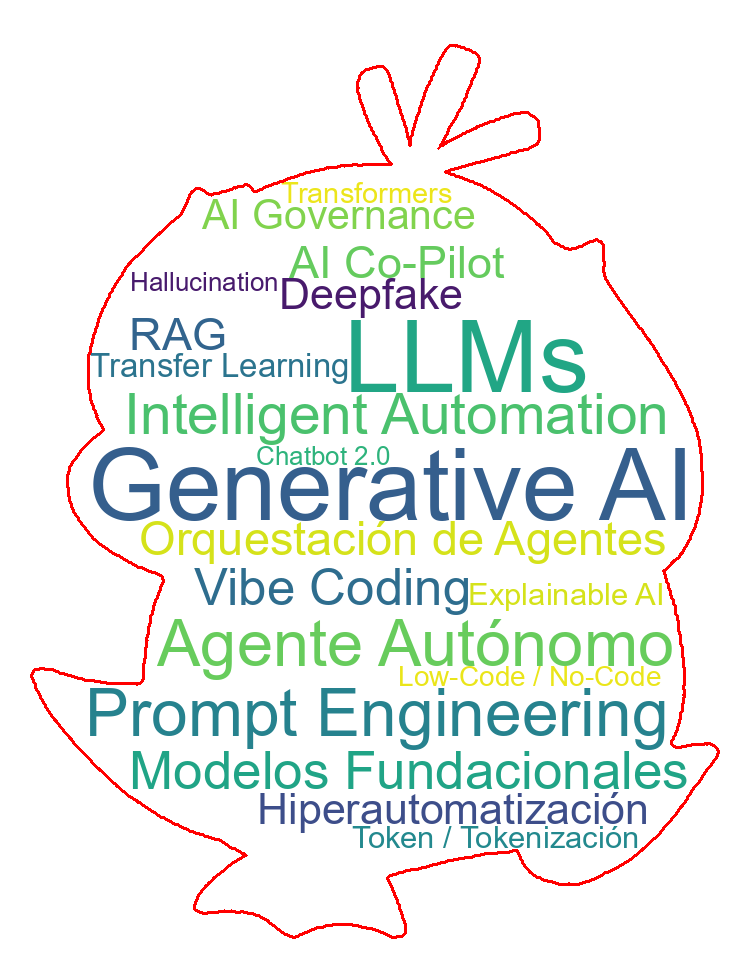

In [35]:
# Ruta de salida temporal para la imagen
ruta_png = "nube_generada.png"
color_de_fondo = (255, 255, 255) # Un color gris oscuro

# --- 3. Invocación de la Función ---
crear_nube_palabras(datos, ruta_png, color_fondo=color_de_fondo, mascara = "psyduck_mask.png", color_contorno="red")

# --- 4. Despliegue de la Imagen en Jupyter/Colab ---

# Cargar la imagen generada usando PIL (Pillow)
try:
    img = Image.open(ruta_png)
    # Mostrar la imagen directamente en la salida de la celda
    print("\n--- Imagen Generada ---")
    display(img)
except FileNotFoundError:
    print(f"\nError: No se encontró el archivo '{ruta_png}' para mostrarlo.")
except Exception as e:
    print(f"\nError al intentar desplegar la imagen: {e}")